### A cloth manufacturing company is interested to know about the segment or attributes causes high sale 

#### Importing the Libearies 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [47]:
data = pd.read_csv('F://Data_Set/Company_Data.csv') 

In [48]:
data.head() 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Dataset description 

In [49]:
data.describe() 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Check any Null Value Present in the Dataset or Not 

In [50]:
data.isnull().sum() 

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [51]:
data.shape 

(400, 11)

#### Visualize the Given Dataset 

Graphical Representation of ShelveLoc Column Using Histogram 

(array([ 96.,   0.,   0.,   0.,   0.,  85.,   0.,   0.,   0., 219.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

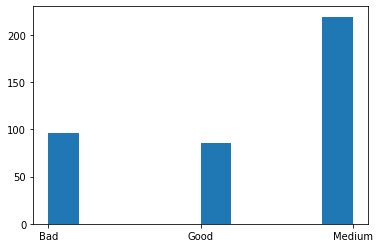

In [48]:
plt.hist(data['ShelveLoc']) 

Graphical Representation of Urban Column Using Histogram 

(array([282.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 118.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

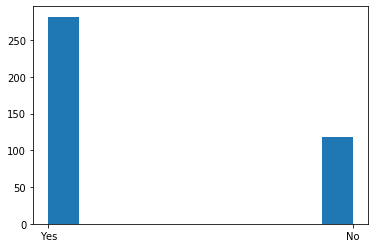

In [49]:
plt.hist(data['Urban']) 

Graphical Representation of US Column Using Histogram 

(array([258.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 142.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

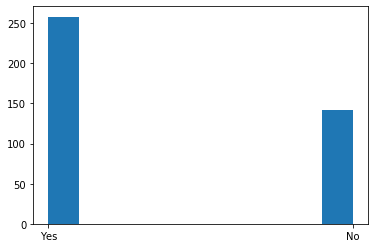

In [51]:
plt.hist(data['US']) 

#### Checking any Outlier Present in the Dataset by Using the Boxplot 

Visualizing BoxPlot of CompPrice Column

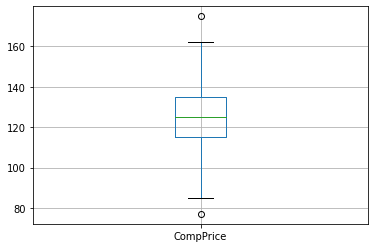

In [54]:
data.boxplot(column=['CompPrice']) 

Visualizing BoxPlot of Income Column

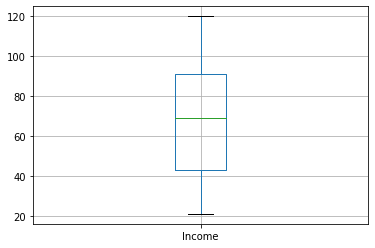

In [56]:
data.boxplot(column=['Income']) 

Visualizing BoxPlot of Advertising Column

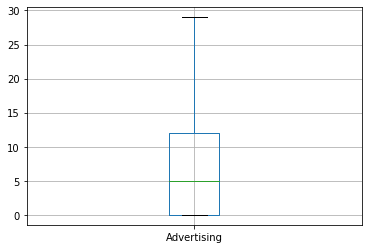

In [58]:
data.boxplot(column=['Advertising']) 

Visualizing BoxPlot of Population Column

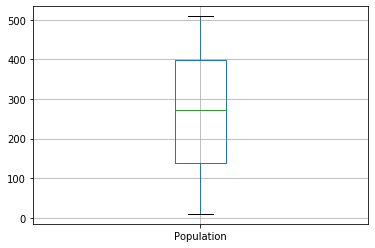

In [60]:
data.boxplot(column=['Population']) 

Visualizing BoxPlot of Price Column

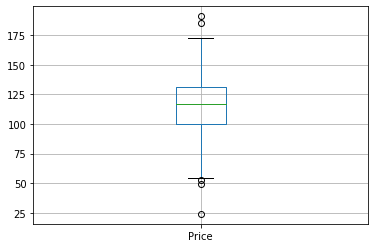

In [62]:
data.boxplot(column=['Price']) 

#### Correlation 

In [53]:
corr = data.corr()

corr 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


#### Heatmap 

<IPython.core.display.Javascript object>

<AxesSubplot:>

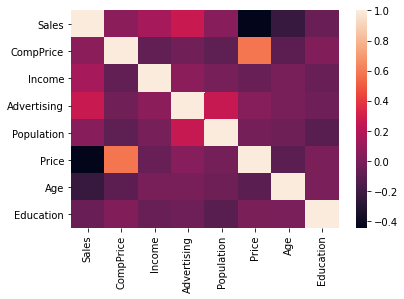

In [55]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#### pair Plot

<IPython.core.display.Javascript object>

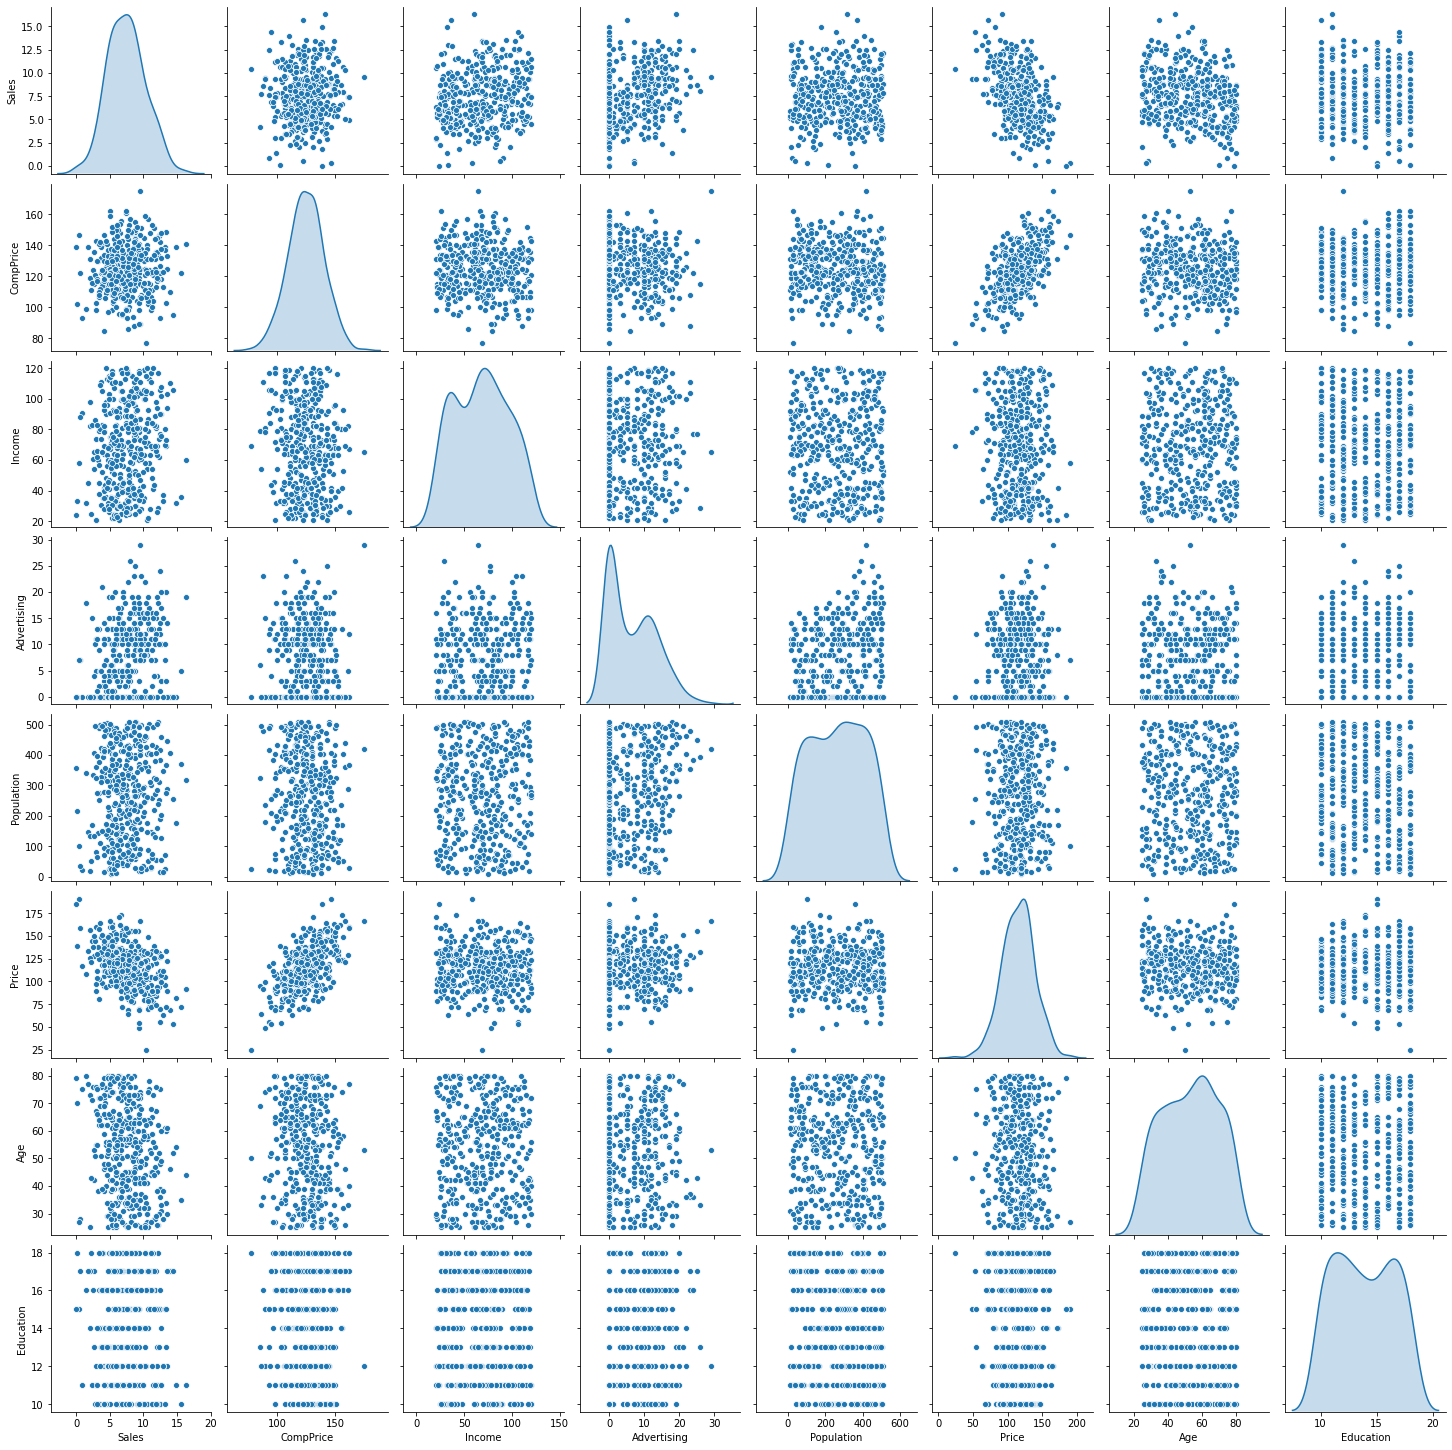

In [54]:
sns.pairplot(data,palette="husl",diag_kind="kde")

#### Histogram

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

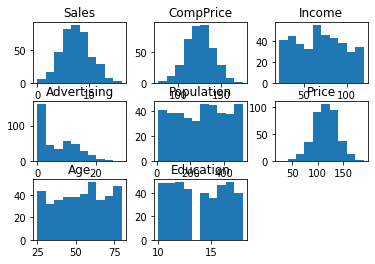

In [56]:
data.hist(grid=False,bins=(10))

In [7]:
data_1 = data 

In [52]:
conditions = [
    (data_1['Sales'] < 5.4),
    (data_1['Sales'] < 7.4) & (data_1['Sales'] > 5.3),
    (data_1['Sales'] > 9.3),
]
values = ['High', 'Medium','Low']
data_1['Sales'] = np.select(conditions, values)

# display updated DataFrame
data_1.head(100)  

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,0,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,0,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,0,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,0,0,1,High
4,141,64,3,340,128,38,13,1,0,0,0,0,1,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,134,25,10,237,148,59,13,0,0,1,0,0,0,1,High
96,147,42,10,407,132,73,16,0,1,0,1,0,0,1,High
97,161,82,5,287,129,33,16,1,0,0,0,0,0,1,High
98,122,77,24,382,127,36,16,0,1,0,1,0,0,1,High


In [9]:
data_1['Sales'].unique() 

array(['Low', '0', 'High', 'Medium'], dtype=object)

In [10]:
data_1['Sales'] = data_1['Sales'].replace(['0'],'Low') 

In [11]:
column_names = ["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US","Sales"] 

In [14]:
data_1 = data.reindex(columns=column_names) 

In [15]:
data_1.head() 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Low
1,111,48,16,260,83,Good,65,10,Yes,Yes,Low
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Low
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,High


In [16]:
data_1 = pd.get_dummies(data_1,columns=['ShelveLoc','Urban','US'])
label_encoder = preprocessing.LabelEncoder()
data_1['Sales']= label_encoder.fit_transform(data_1['Sales'])  

In [17]:
data_1.head() 

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,1,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0


In [18]:
data_1.shape 

(400, 15)

In [19]:
column_names = ["CompPrice","Income","Advertising","Population", "Price","Age","Education","ShelveLoc_Bad","ShelveLoc_Good","ShelveLoc_Medium","Urban_No","Urban_YES","US_No","US_Yes","Sales"] 

In [20]:
data_1 = data_1.reindex(columns=column_names) 

In [21]:
data_1.head() 

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,NaN,0,1,1
1,111,48,16,260,83,65,10,0,1,0,0,NaN,0,1,1
2,113,35,10,269,80,59,12,0,0,1,0,NaN,0,1,1
3,117,100,4,466,97,55,14,0,0,1,0,NaN,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,NaN,1,0,0


In [22]:
x=data_1.iloc[:,:14]
y=data_1.iloc[:,14] 

In [23]:
x1=x 

In [24]:
x1.head() 

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,NaN,0,1
1,111,48,16,260,83,65,10,0,1,0,0,NaN,0,1
2,113,35,10,269,80,59,12,0,0,1,0,NaN,0,1
3,117,100,4,466,97,55,14,0,0,1,0,NaN,0,1
4,141,64,3,340,128,38,13,1,0,0,0,NaN,1,0


In [25]:
data_1['Urban_YES'] = x1['Urban_YES'].fillna(0) 

In [26]:
data_1.head() 

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,0.0,0,1,1
1,111,48,16,260,83,65,10,0,1,0,0,0.0,0,1,1
2,113,35,10,269,80,59,12,0,0,1,0,0.0,0,1,1
3,117,100,4,466,97,55,14,0,0,1,0,0.0,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,0.0,1,0,0


In [27]:
data_1 = data_1.astype(int) 

In [28]:
x=data_1.iloc[:,:14]
y=data_1.iloc[:,14] 

In [29]:
x 

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,0,0,1
1,111,48,16,260,83,65,10,0,1,0,0,0,0,1
2,113,35,10,269,80,59,12,0,0,1,0,0,0,1
3,117,100,4,466,97,55,14,0,0,1,0,0,0,1
4,141,64,3,340,128,38,13,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,0,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,0,0,1
398,100,79,7,284,95,50,12,1,0,0,0,0,0,1


In [30]:
y 

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    2
397    1
398    2
399    1
Name: Sales, Length: 400, dtype: int32

In [31]:
data_1['Sales'].unique() 

array([1, 0, 2])

In [32]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [33]:
data_1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         400 non-null    int32
 1   Income            400 non-null    int32
 2   Advertising       400 non-null    int32
 3   Population        400 non-null    int32
 4   Price             400 non-null    int32
 5   Age               400 non-null    int32
 6   Education         400 non-null    int32
 7   ShelveLoc_Bad     400 non-null    int32
 8   ShelveLoc_Good    400 non-null    int32
 9   ShelveLoc_Medium  400 non-null    int32
 10  Urban_No          400 non-null    int32
 11  Urban_YES         400 non-null    int32
 12  US_No             400 non-null    int32
 13  US_Yes            400 non-null    int32
 14  Sales             400 non-null    int32
dtypes: int32(15)
memory usage: 23.6 KB


#### Applay Random Forest Classifier 

In [34]:
from sklearn.ensemble import RandomForestClassifier 

In [35]:
rfc_regressor1 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0) 

Train the Model 

In [36]:
rfc_regressor1.fit(x_train,y_train)  

RandomForestClassifier(criterion='entropy', random_state=0)

#### Predict the Test Set Result 

In [37]:
y_pred1 = rfc_regressor1.predict(x_test)  

In [38]:
y_pred1 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1,
       2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0])

#### Using Confussion Matrix to Check the acuret result in prediction 

In [39]:
from sklearn.metrics import confusion_matrix 

In [40]:
cm = confusion_matrix(y_test,y_pred1)  

In [41]:
cm  

array([[11,  5,  7],
       [ 2, 33,  2],
       [ 6, 12,  2]], dtype=int64)

#### Find the Accuracy of Model by using accuracy matrix 

In [42]:
from sklearn.metrics import accuracy_score 

In [43]:
accuracy = accuracy_score(y_test,y_pred1) 

In [44]:
accuracy 

0.575